# 0. Read Me

This notebook serves to attempt to encode `nucleotide_seq` by mapping `{'A': 0, 'G': 1, 'T': 2, 'C': 3, 'U': 4}` so to test it effects as a feature. 

# 1. Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupShuffleSplit
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, auc, ConfusionMatrixDisplay, classification_report

# 2. Loading the dataset 

In [68]:
mean_with_label_df = pd.read_csv("../dataset/mean_with_labels.csv")
mean_with_label_df.head()

,transcript_name,json_position,nucleotide_seq,dwelling_time_min1,sd_min1,mean_min1,dwelling_time,sd,mean,dwelling_time_plus1,sd_plus1,mean_plus1,dwelling_time_merged,sd_merged,mean_merged,gene_id,label
0,ENST00000361789,3,ATGACCC,0.008473,4.156000,98.027500,0.008403,9.436250,117.550000,0.005935,3.180750,79.072500,0.007603,5.591000,98.216667,ENSG00000198727,0
1,ENST00000362079,3,ATGACCC,0.005891,4.074295,98.133333,0.006638,9.287051,118.069231,0.006602,3.726708,76.041026,0.006377,5.696018,97.414530,ENSG00000198938,0
2,ENST00000330439,4,CTGACTG,0.005284,3.684516,111.146774,0.007605,7.364839,121.612903,0.006873,2.795000,91.145161,0.006587,4.614785,107.968280,ENSG00000169715,0
3,ENST00000380455,5,GGAACCT,0.006620,8.528696,120.826087,0.010325,3.845217,94.739130,0.006050,1.993043,86.426087,0.007665,4.788986,100.663768,ENSG00000124588,0
4,ENST00000387347,5,TAAACCT,0.007985,2.421880,104.497000,0.007066,4.059900,98.490000,0.005260,3.336200,79.857000,0.006770,3.272660,94.281333,ENSG00000210082,0


# 3. One hot encoding of nucleotide_seq

In [5]:
mapping = {nucleotide: idx for idx, nucleotide in enumerate('AGTCU')}
print(mapping)

{'A': 0, 'G': 1, 'T': 2, 'C': 3, 'U': 4}


In [6]:
def encode_sequence(seq):
    return [mapping[nucleotide] for nucleotide in seq]

In [69]:
mean_with_label_df.shape

(121838, 17)

In [7]:
mean_with_label_df['nucleotide_seq'] = mean_with_label_df['nucleotide_seq'].apply(encode_sequence)
mean_with_label_df.head()

,transcript_name,json_position,nucleotide_seq,dwelling_time_min1,sd_min1,mean_min1,dwelling_time,sd,mean,dwelling_time_plus1,sd_plus1,mean_plus1,dwelling_time_merged,sd_merged,mean_merged,gene_id,label
0,ENST00000361789,3,"[0, 2, 1, 0, 3, 3, 3]",0.008473,4.156000,98.027500,0.008403,9.436250,117.550000,0.005935,3.180750,79.072500,0.007603,5.591000,98.216667,ENSG00000198727,0
1,ENST00000362079,3,"[0, 2, 1, 0, 3, 3, 3]",0.005891,4.074295,98.133333,0.006638,9.287051,118.069231,0.006602,3.726708,76.041026,0.006377,5.696018,97.414530,ENSG00000198938,0
2,ENST00000330439,4,"[3, 2, 1, 0, 3, 2, 1]",0.005284,3.684516,111.146774,0.007605,7.364839,121.612903,0.006873,2.795000,91.145161,0.006587,4.614785,107.968280,ENSG00000169715,0
3,ENST00000380455,5,"[1, 1, 0, 0, 3, 3, 2]",0.006620,8.528696,120.826087,0.010325,3.845217,94.739130,0.006050,1.993043,86.426087,0.007665,4.788986,100.663768,ENSG00000124588,0
4,ENST00000387347,5,"[2, 0, 0, 0, 3, 3, 2]",0.007985,2.421880,104.497000,0.007066,4.059900,98.490000,0.005260,3.336200,79.857000,0.006770,3.272660,94.281333,ENSG00000210082,0


In [8]:
mean_with_label_df['pos_min1'] = mean_with_label_df['nucleotide_seq'].apply(lambda x: x[2])
mean_with_label_df['pos'] = mean_with_label_df['nucleotide_seq'].apply(lambda x: x[3])
mean_with_label_df['pos_plus1'] = mean_with_label_df['nucleotide_seq'].apply(lambda x: x[4])
mean_with_label_df.head()

,transcript_name,json_position,nucleotide_seq,dwelling_time_min1,sd_min1,mean_min1,dwelling_time,sd,mean,dwelling_time_plus1,sd_plus1,mean_plus1,dwelling_time_merged,sd_merged,mean_merged,gene_id,label,pos_min1,pos,pos_plus1
0,ENST00000361789,3,"[0, 2, 1, 0, 3, 3, 3]",0.008473,4.156000,98.027500,0.008403,9.436250,117.550000,0.005935,3.180750,79.072500,0.007603,5.591000,98.216667,ENSG00000198727,0,1,0,3
1,ENST00000362079,3,"[0, 2, 1, 0, 3, 3, 3]",0.005891,4.074295,98.133333,0.006638,9.287051,118.069231,0.006602,3.726708,76.041026,0.006377,5.696018,97.414530,ENSG00000198938,0,1,0,3
2,ENST00000330439,4,"[3, 2, 1, 0, 3, 2, 1]",0.005284,3.684516,111.146774,0.007605,7.364839,121.612903,0.006873,2.795000,91.145161,0.006587,4.614785,107.968280,ENSG00000169715,0,1,0,3
3,ENST00000380455,5,"[1, 1, 0, 0, 3, 3, 2]",0.006620,8.528696,120.826087,0.010325,3.845217,94.739130,0.006050,1.993043,86.426087,0.007665,4.788986,100.663768,ENSG00000124588,0,0,0,3
4,ENST00000387347,5,"[2, 0, 0, 0, 3, 3, 2]",0.007985,2.421880,104.497000,0.007066,4.059900,98.490000,0.005260,3.336200,79.857000,0.006770,3.272660,94.281333,ENSG00000210082,0,0,0,3


# 4. Train-test split

In [9]:
unique_genes = mean_with_label_df['gene_id'].unique()
train_genes, test_genes = train_test_split(unique_genes, test_size = 0.2, random_state = 42)
train_df = mean_with_label_df[mean_with_label_df['gene_id'].isin(train_genes)]
test_df = mean_with_label_df[mean_with_label_df['gene_id'].isin(test_genes)]

features_column = [mean_with_label_df.columns[1]]
features_column = features_column + list(mean_with_label_df.columns[3:])
features_column.remove('gene_id')
features_column.remove('label')
label_column = mean_with_label_df.columns[-4]

Xtrain = train_df[features_column]
ytrain = train_df[label_column]
Xtest = test_df[features_column]
ytest = test_df[label_column]

# 4a. Feature Selection

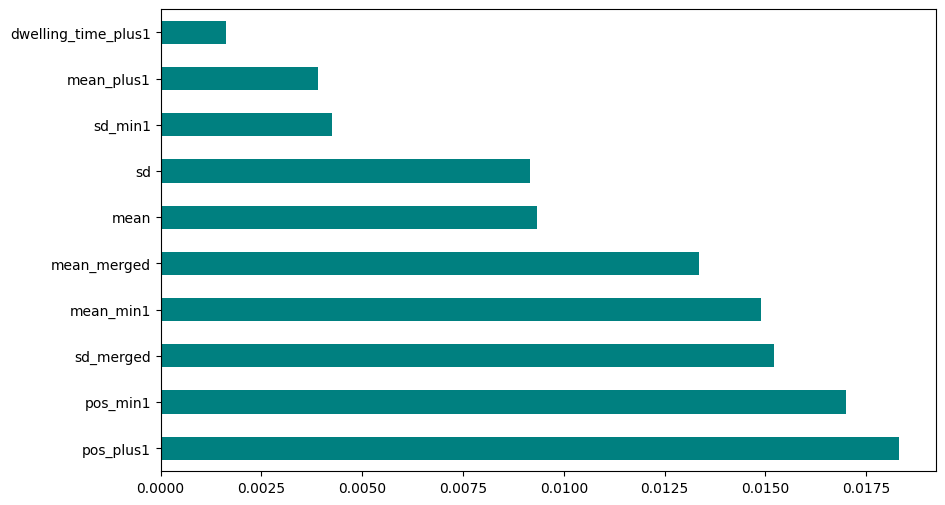

In [10]:
# Feature Selection by Filter method
# Information Gain
importances = mutual_info_classif(Xtrain, ytrain)
feat_importances = pd.Series(importances, Xtrain.columns)

# Select the top 10 features
top_10_feats = feat_importances.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_feats.plot(kind='barh', color='teal')
plt.show()

In [74]:
# # features_list = ['pos_min1', 'pos_plus1', 'pos']
# features_list = ['sd', 'mean', 'sd_min1']
features_list = ['json_position', 'mean_plus1', 'sd_min1', 'sd', 'mean', 'mean_merged', 'mean_min1', 'sd_merged', 'pos_plus1', 'pos_min1']

# 5. Model Training

In [75]:
logreg = LogisticRegression()
logreg.fit(Xtrain.loc[:, features_list], ytrain)
y_pred = logreg.predict(Xtest.loc[:, features_list])
y_pred_prob = logreg.predict_proba(Xtest.loc[:, features_list])
print(y_pred_prob)

[[0.98399672 0.01600328]
 [0.93770605 0.06229395]
 [0.94446691 0.05553309]
 ...
 [0.96562468 0.03437532]
 [0.9766717  0.0233283 ]
 [0.98237053 0.01762947]]


c:\Users\lisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 6. Model Evaluation

## Classification Report 

In [42]:
target_names = ['no m6a modification', 'm6a modification']
print(classification_report(ytest, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

no m6a modification       0.96      1.00      0.98     25378
   m6a modification       0.00      0.00      0.00      1174

           accuracy                           0.96     26552
          macro avg       0.48      0.50      0.49     26552
       weighted avg       0.91      0.96      0.93     26552



c:\Users\lisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## ROC-AUC Score and plot

In [76]:
y_pred_prob = y_pred_prob[:, 1] # probabilities that the model assigned to predict m6A
lr_auc = roc_auc_score(ytest, y_pred_prob, average = "micro")
print(f"ROC-AUC score: {round(lr_auc, 3)}")

ROC-AUC score: 0.661


[0.00000000e+00 3.94042084e-05 2.04901884e-03 ... 9.91173457e-01
 9.91173457e-01 1.00000000e+00]
[0.         0.         0.         ... 0.99914821 1.         1.        ]


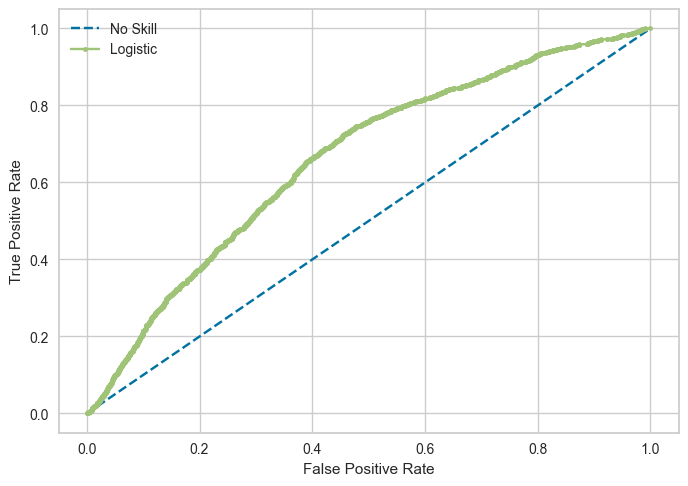

In [77]:
# AUC-ROC Plot 
lr_fpr, lr_tpr, thresholds = roc_curve(ytest, y_pred_prob) 
# thresholds[0] represents no instances being predicted, arbitrarily set to np.inf
print(lr_fpr)
print(lr_tpr)

# to get the no skill line
ns_probs = [0 for _ in range(len(ytest))]
ns_fpr, ns_tpr, thresholds = roc_curve(ytest, ns_probs)

#plotting
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = "No Skill")
plt.plot(lr_fpr, lr_tpr, marker = '.', label = "Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Precision-Recall Curve 

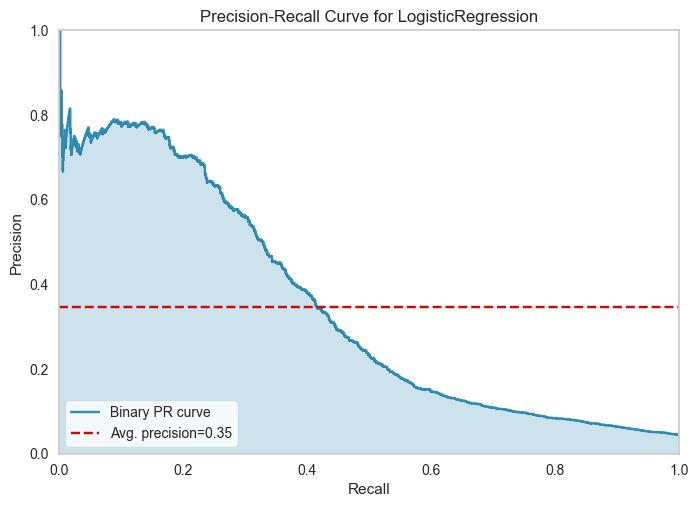

In [59]:
# !pip install yellowbrick
from yellowbrick.classifier import precision_recall_curve
viz = precision_recall_curve(LogisticRegression(max_iter = 1000), Xtrain, ytrain, Xtest, ytest)

## 7. Model Evaluation of dataset1


In [80]:
dataset1 = pd.read_csv("../dataset/dataset1.csv")
# dataset1_test = dataset1.loc[:,features_list]
# dataset1_test.shape
dataset1.shape

(1171940, 12)

In [53]:
dataset1_pred_prob = logreg.predict_proba(dataset1_test)
print(dataset1_pred_prob.shape)

(7907952, 2)
